## Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Suppress ta warnings
import warnings
warnings.filterwarnings("ignore")

# Auto reload local files
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if 'src' not in sys.path:
    sys.path.insert(0, '../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Read SPY csv, define config
spy_constituents = list(pd.read_csv('../../data/spy_constituents.csv', header=0)['Symbol'])
random.shuffle(spy_constituents)

tickers = spy_constituents
start_date = "2000-01-01"
end_date = "2025-01-01"
predict_window = 14

## Sync & Load Data, Create Indicators

In [25]:
# Load the data from db
from sklearn.model_selection import train_test_split

import datastore as ds
from technical_signals import TechnicalSignalSet

curs = ["USD", "EUR", "GBP", "JPY", "CNY"]
pairs = [(a, b) for i, a in enumerate(curs) \
                for b in curs[i + 1:] \
                if a != b]
for f, t in pairs:
    ds.delete_all_daily_candlesticks(f"{f}/{t}")
ds.download_forex_daily_candlesticks(pairs)
#ds.download_daily_candlesticks(tickers, start_date, end_date)
candlesticks = ds.get_daily_candlesticks(["USD/EUR"], start_date, end_date)
print(candlesticks["USD/EUR"].iloc[0])
"""
Xs = []
ys = []

for ticker in tickers:
    try:
        technical_sigs = TechnicalSignalSet(candlesticks[ticker], predict_window)
        X, y, Xy_date = technical_sigs.to_xy()
        Xs.append(X)
        ys.append(y)
    except Exception as ex:
        print(f"Exception on {ticker}:")
        print(ex)

X = np.concatenate(Xs, axis=0)
y = np.concatenate(ys, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
"""

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'EUR', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 05:55:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '1.00590', '2. high': '1.00840', '3. low': '1.00490', '4. close': '1.00760'}, '2022-08-26': {'1. open': '1.00210', '2. high': '1.00480', '3. low': '0.99140', '4. close': '1.00250'}, '2022-08-25': {'1. open': '1.00290', '2. high': '1.00460', '3. low': '0.99640', '4. close': '1.00200'}, '2022-08-24': {'1. open': '1.00270', '2. high': '1.00870', '3. low': '1.00020', '4. close': '1.00290'}, '2022-08-23': {'1. open': '1.00550', '2. high': '1.00950', '3. low': '0.99820', '4. close': '1.00290'}, '2022-08-22': {'1. open': '0.99590', '2. high': '1.00720', '3. low': '0.99510', '4. close': '1.00530'}, '2022-08-19': {'1. open': '0.99100', '2. high': '0.99650', '3. low': '0.99030', '4. close': '0.99560'}, '2022-08-18': {'1.

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'GBP', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 05:55:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '0.85507', '2. high': '0.85837', '3. low': '0.85471', '4. close': '0.85757'}, '2022-08-26': {'1. open': '0.84475', '2. high': '0.85253', '3. low': '0.84071', '4. close': '0.85243'}, '2022-08-25': {'1. open': '0.84770', '2. high': '0.84865', '3. low': '0.84312', '4. close': '0.84483'}, '2022-08-24': {'1. open': '0.84505', '2. high': '0.85063', '3. low': '0.84470', '4. close': '0.84781'}, '2022-08-23': {'1. open': '0.84993', '2. high': '0.85341', '3. low': '0.84194', '4. close': '0.84504'}, '2022-08-22': {'1. open': '0.84583', '2. high': '0.85143', '3. low': '0.84481', '4. close': '0.85001'}, '2022-08-19': {'1. open': '0.83789', '2. high': '0.84798', '3. low': '0.83779', '4. close': '0.84578'}, '2022-08-18': {'1.

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'JPY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 05:55:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '138.14500', '2. high': '139.00200', '3. low': '138.05000', '4. close': '138.82900'}, '2022-08-26': {'1. open': '136.47200', '2. high': '137.75500', '3. low': '136.18700', '4. close': '137.75200'}, '2022-08-25': {'1. open': '137.10700', '2. high': '137.20100', '3. low': '136.29000', '4. close': '136.47600'}, '2022-08-24': {'1. open': '136.71100', '2. high': '137.24400', '3. low': '136.15000', '4. close': '137.10000'}, '2022-08-23': {'1. open': '137.48800', '2. high': '137.70700', '3. low': '135.78000', '4. close': '136.71200'}, '2022-08-22': {'1. open': '136.82100', '2. high': '137.65100', '3. low': '136.67000', '4. close': '137.50100'}, '2022-08-19': {'1. open': '135.86400', '2. high': '137.23100', '3. low': '

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'CNY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 05:55:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '6.89770', '2. high': '6.92200', '3. low': '6.89770', '4. close': '6.91930'}, '2022-08-26': {'1. open': '6.84740', '2. high': '6.87280', '3. low': '6.84740', '4. close': '6.87100'}, '2022-08-25': {'1. open': '6.84790', '2. high': '6.85720', '3. low': '6.84250', '4. close': '6.84820'}, '2022-08-24': {'1. open': '6.84440', '2. high': '6.86940', '3. low': '6.84250', '4. close': '6.85950'}, '2022-08-23': {'1. open': '6.84350', '2. high': '6.86600', '3. low': '6.82960', '4. close': '6.83410'}, '2022-08-22': {'1. open': '6.82600', '2. high': '6.85070', '3. low': '6.82120', '4. close': '6.84860'}, '2022-08-19': {'1. open': '6.80100', '2. high': '6.81870', '3. low': '6.80100', '4. close': '6.81690'}, '2022-08-18': {'1.

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'EUR', '3. To Symbol': 'GBP', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 06:00:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '0.84990', '2. high': '0.85118', '3. low': '0.84940', '4. close': '0.85090'}, '2022-08-26': {'1. open': '0.84266', '2. high': '0.85027', '3. low': '0.84250', '4. close': '0.84847'}, '2022-08-25': {'1. open': '0.84508', '2. high': '0.84614', '3. low': '0.84220', '4. close': '0.84264'}, '2022-08-24': {'1. open': '0.84230', '2. high': '0.84566', '3. low': '0.84060', '4. close': '0.84504'}, '2022-08-23': {'1. open': '0.84518', '2. high': '0.84531', '3. low': '0.84140', '4. close': '0.84214'}, '2022-08-22': {'1. open': '0.84840', '2. high': '0.84935', '3. low': '0.84330', '4. close': '0.84518'}, '2022-08-19': {'1. open': '0.84543', '2. high': '0.85115', '3. low': '0.84508', '4. close': '0.84836'}, '2022-08-18': {'1.

{'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'}
Error downloading daily candlesticks for EUR/JPY. Waiting 60s.
{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'EUR', '3. To Symbol': 'CNY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 06:00:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '6.82800', '2. high': '6.86840', '3. low': '6.81980', '4. close': '6.86090'}, '2022-08-26': {'1. open': '6.83070', '2. high': '6.91730', '3. low': '6.82260', '4. close': '6.84660'}, '2022-08-25': {'1. open': '6.83680', '2. high': '6.86700', '3. low': '6.81350', '4. close': '6.83130'}, '2022-08-24': {'1. open': '6.81310', '2. high': '6.85540', '3. low': '6.79690', '4. close': '6.83610'}, '2022-08-23': {'1. open': '6.80740',

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'GBP', '3. To Symbol': 'JPY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 06:00:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '161.51700', '2. high': '161.95000', '3. low': '161.42000', '4. close': '161.84900'}, '2022-08-26': {'1. open': '161.51800', '2. high': '162.68100', '3. low': '161.19000', '4. close': '161.75700'}, '2022-08-25': {'1. open': '161.66600', '2. high': '161.98900', '3. low': '161.29000', '4. close': '161.50800'}, '2022-08-24': {'1. open': '161.75800', '2. high': '161.89700', '3. low': '160.81000', '4. close': '161.66600'}, '2022-08-23': {'1. open': '161.75000', '2. high': '162.31400', '3. low': '160.78000', '4. close': '161.75900'}, '2022-08-22': {'1. open': '161.80800', '2. high': '162.52700', '3. low': '161.14000', '4. close': '161.76600'}, '2022-08-19': {'1. open': '162.07100', '2. high': '162.83700', '3. low': '

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'GBP', '3. To Symbol': 'CNY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 06:00:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '8.04920', '2. high': '8.07310', '3. low': '8.04870', '4. close': '8.06400'}, '2022-08-26': {'1. open': '8.10670', '2. high': '8.15650', '3. low': '8.07070', '4. close': '8.07180'}, '2022-08-25': {'1. open': '8.08710', '2. high': '8.11920', '3. low': '8.07880', '4. close': '8.10720'}, '2022-08-24': {'1. open': '8.08620', '2. high': '8.12060', '3. low': '8.06770', '4. close': '8.09030'}, '2022-08-23': {'1. open': '8.06320', '2. high': '8.11100', '3. low': '8.04450', '4. close': '8.08820'}, '2022-08-22': {'1. open': '8.06070', '2. high': '8.08980', '3. low': '8.04490', '4. close': '8.05480'}, '2022-08-19': {'1. open': '8.08620', '2. high': '8.11890', '3. low': '8.04060', '4. close': '8.06280'}, '2022-08-18': {'1.

{'Meta Data': {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'JPY', '3. To Symbol': 'CNY', '4. Output Size': 'Full size', '5. Last Refreshed': '2022-08-29 06:00:00', '6. Time Zone': 'UTC'}, 'Time Series FX (Daily)': {'2022-08-29': {'1. open': '0.04980', '2. high': '0.04990', '3. low': '0.04972', '4. close': '0.04977'}, '2022-08-26': {'1. open': '0.05013', '2. high': '0.05020', '3. low': '0.04990', '4. close': '0.04998'}, '2022-08-25': {'1. open': '0.04997', '2. high': '0.05020', '3. low': '0.04994', '4. close': '0.05013'}, '2022-08-24': {'1. open': '0.04995', '2. high': '0.05034', '3. low': '0.04994', '4. close': '0.04998'}, '2022-08-23': {'1. open': '0.04979', '2. high': '0.05019', '3. low': '0.04971', '4. close': '0.04994'}, '2022-08-22': {'1. open': '0.04976', '2. high': '0.04997', '3. low': '0.04961', '4. close': '0.04976'}, '2022-08-19': {'1. open': '0.04977', '2. high': '0.04998', '3. low': '0.04965', '4. close': '0.04973'}, '2022-08-18': {'1.

'\nXs = []\nys = []\n\nfor ticker in tickers:\n    try:\n        technical_sigs = TechnicalSignalSet(candlesticks[ticker], predict_window)\n        X, y, Xy_date = technical_sigs.to_xy()\n        Xs.append(X)\n        ys.append(y)\n    except Exception as ex:\n        print(f"Exception on {ticker}:")\n        print(ex)\n\nX = np.concatenate(Xs, axis=0)\ny = np.concatenate(ys, axis=0)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)\n'

## Clean Data For Training

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import gc


def round_batch_size(sample_count, approximately, leeway=None):
    """
    Round batch size to a more suitable value. This helps to avoid a
    problem where the final batch has a lot of samples, but not enough for
    a full batch, leading to many samples being thrown out.

    approximately: int, leeway: int
      decide on a chunk size around a number, with specified leeway
      (leeway defaults to `approximately // 10`).
    """
    if leeway is None:
        leeway = approximately // 10
    
    # Get the number of leftover samples if we use the suggested batch size
    best_leftover = sample_count - np.floor(sample_count / approximately) * approximately

    # Brute-force search for the value that yeilds the fewest leftovers
    # within the given leeway range.
    best_chunk_count = approximately
    for offset in range(-leeway, leeway):
        chunk_size = approximately + offset
        leftover = sample_count - np.floor(sample_count / chunk_size) * chunk_size
        if leftover < best_leftover:
            best_leftover = leftover
            best_chunk_count = chunk_size
    return best_chunk_count
            

batch_size = round_batch_size(X_train.shape[0], 1024, leeway=200)
n_features = X_train.shape[1]

# Convert X, y to torch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train.reshape(y_train.shape[0], 1)).float()
y_test_tensor = torch.from_numpy(y_test.reshape(y_test.shape[0], 1)).float()

print(X_train_tensor.shape)
print('Batch size:', batch_size)

# Generators
training_set = TensorDataset(X_train_tensor, y_train_tensor)
dataloader_train = DataLoader(training_set, shuffle=True, batch_size=batch_size)

validation_set = TensorDataset(X_test_tensor, y_test_tensor)
dataloader_test = DataLoader(validation_set, shuffle=True, batch_size=batch_size)

# Release duplicated memory
try:
    del X
    del y
    del Xs
    del ys
    #del X_train
    #del X_test
    #del y_train
    #del y_test
    del X_train_tensor
    del X_test_tensor
    del y_train_tensor
    del y_test_tensor
except:
    pass
gc.collect()

torch.Size([2060183, 58])
Batch size: 862


0

## Create the NN model

In [5]:
n_outputs = 1

net = nn.Sequential(
    nn.Linear(n_features, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, n_outputs),
)

## Training

In [6]:
device = torch.device("cuda")

# Set device for model
net = net.to(device)

# Select optimizerand loss criteria
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) 

# Training the model
for epoch in range(200):
    train_loss = 0.0
    
    # Training
    net.train()
    for local_batch, local_labels in dataloader_train:
        if local_batch.shape[0] != batch_size:
            print(f"Wrong train batch size. Skipping batch.\nThrowing away {local_batch.shape[0]} samples.")
            continue
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)
        
        # Forward pass: Compute predicted y by passing x to the model 
        y_pred = net(local_batch)
        # Compute and print loss 
        loss = criterion(y_pred, local_labels)
        # Zero gradients, perform a backward pass, update the weights. 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        # Update loss
        train_loss += loss.item()

    # Validation
    net.eval()
    valid_loss = 0.0
    for data, labels in dataloader_test:
        if data.shape[0] != batch_size:
            continue
        data, labels = data.to(device), labels.to(device)
        
        target = net(data)
        loss = criterion(target,labels)
        valid_loss += loss.item()

    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(dataloader_train)} \t\t Validation Loss: {valid_loss / len(dataloader_test)}')

Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 1 		 Training Loss: 0.8919672556673319 		 Validation Loss: 0.8755691100780228
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 2 		 Training Loss: 0.851004434150415 		 Validation Loss: 0.8474285548790953
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 3 		 Training Loss: 0.8295962237902936 		 Validation Loss: 0.8326356897228643
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 4 		 Training Loss: 0.8133054015677327 		 Validation Loss: 0.8181118709700448
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 5 		 Training Loss: 0.8008172252047565 		 Validation Loss: 0.8118571898991004
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 6 		 Training Loss: 0.7871325986248736 		 Validation Loss: 0.8061492328805134
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 7 		 Training Loss: 0.77544405663776

Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 56 		 Training Loss: 0.6186741809374315 		 Validation Loss: 0.6767812082193848
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 57 		 Training Loss: 0.6185602948088269 		 Validation Loss: 0.6697963946744016
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 58 		 Training Loss: 0.6163429464445309 		 Validation Loss: 0.668877738534956
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 59 		 Training Loss: 0.6158646441737462 		 Validation Loss: 0.6689200681403167
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 60 		 Training Loss: 0.6149362190554502 		 Validation Loss: 0.6669730626998988
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 61 		 Training Loss: 0.6139995477305252 		 Validation Loss: 0.6687951726572854
Wrong train batch size. Skipping batch.
Throwing away 3 samples.
Epoch 62 		 Training Loss: 0.6133505

KeyboardInterrupt: 

## Backtest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ticker: BAX
131 buy/sells performed - 2.2982456140350878% of the time
Stock price change: -13.809744322697732%
Total gain/loss: -7.026399955749511%
ROI: -10.806936544956464%
{'cash': 7017.360004425049, 'assets': 38, 'latest_price': 60.0, 'total_value': 9297.360004425049, 'roi': -0.10806936544956464}


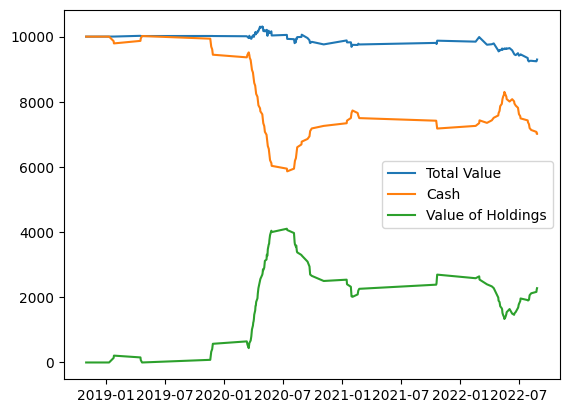

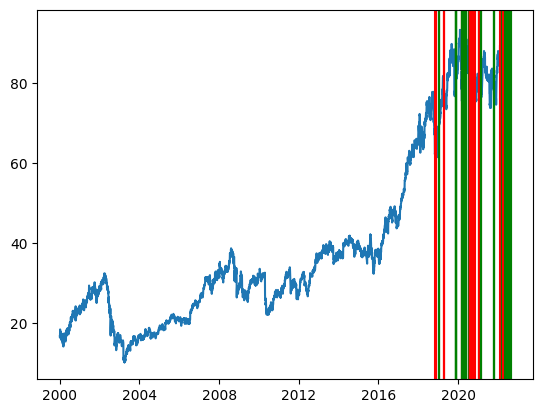

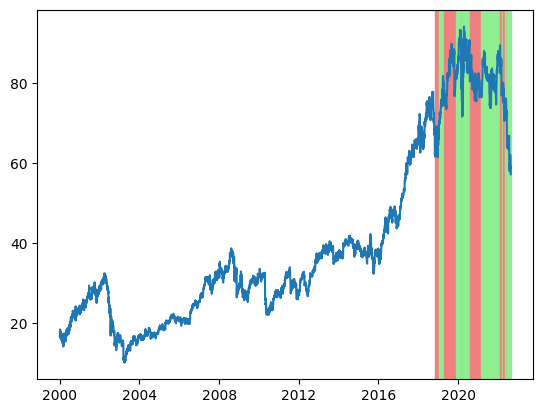

Ticker: BIIB
275 buy/sells performed - 4.824561403508771% of the time
Stock price change: -31.959434111013845%
Total gain/loss: 3.655000457763672%
ROI: 1.0662356793997467%
{'cash': 2357.6299743652344, 'assets': 39, 'latest_price': 205.3300018310547, 'total_value': 10365.500045776367, 'roi': 0.010662356793997468}


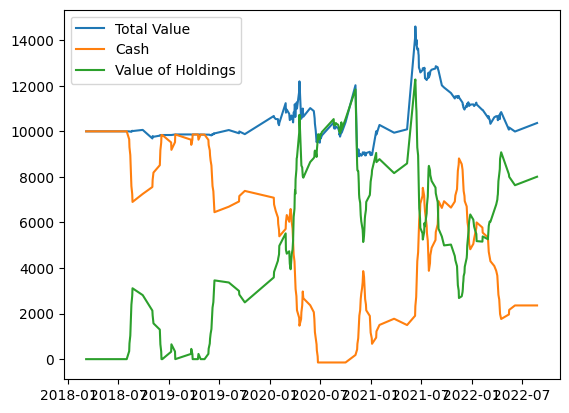

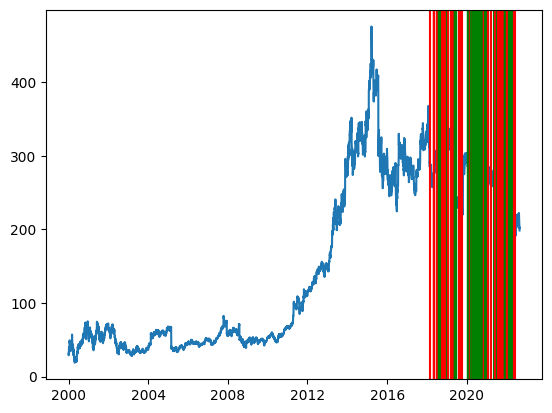

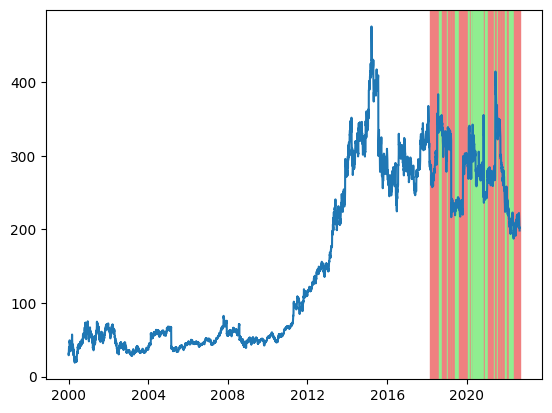

Ticker: TTWO
432 buy/sells performed - 7.578947368421053% of the time
Stock price change: 19.08632299181173%
Total gain/loss: 10.78540023803711%
ROI: 9.396683264506763%
{'cash': 10950.380020141602, 'assets': 1, 'latest_price': 128.16000366210938, 'total_value': 11078.540023803711, 'roi': 0.09396683264506762}


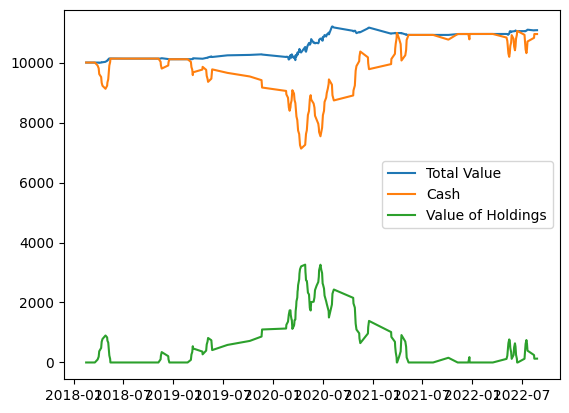

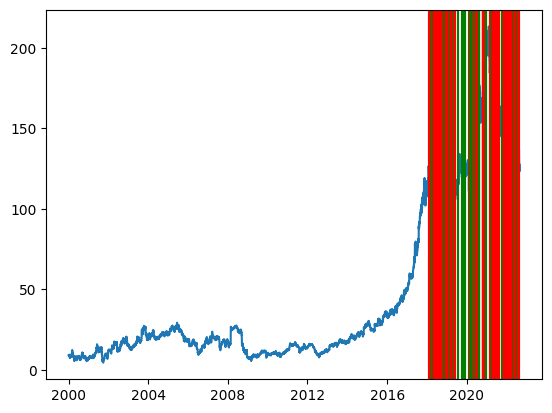

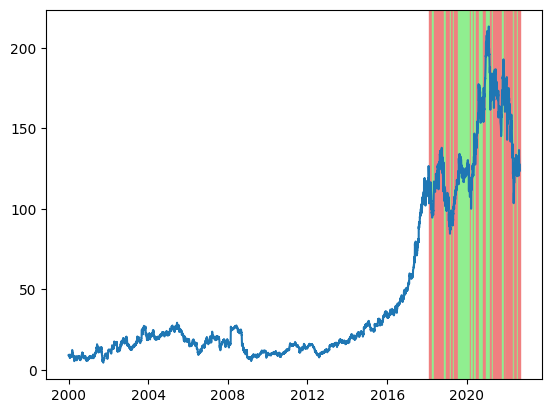

{'average_gainloss': 247.13335800170898,
 'results': {'BAX': {'cash': 7017.360004425049,
   'assets': 38,
   'latest_price': 60.0,
   'total_value': 9297.360004425049,
   'roi': -0.10806936544956464},
  'BIIB': {'cash': 2357.6299743652344,
   'assets': 39,
   'latest_price': 205.3300018310547,
   'total_value': 10365.500045776367,
   'roi': 0.010662356793997468},
  'TTWO': {'cash': 10950.380020141602,
   'assets': 1,
   'latest_price': 128.16000366210938,
   'total_value': 11078.540023803711,
   'roi': 0.09396683264506762}}}

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/home/jared/.local/share/virtualenvs/stock-p

In [7]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import backtest as bt
from strategy import PretrainedModelStrategy, SignalModelStrategy
from technical_signals import TechnicalSignalSet
from sklearn.svm import SVR

random.shuffle(spy_constituents)

# XXX temporary - need to rework concurrency to be suitable for CUDA
# (Must use `spawn` as opposed to `fork` based concurrency I believe - separate OS processes?)
net = net.to(torch.device('cpu'))

def predict(net):
    return lambda X:\
        net(torch.from_numpy(X).float().cpu()).detach().numpy()

def df_to_signal_set(df):
    return TechnicalSignalSet(df, predict_window=predict_window)

#strategy = PretrainedModelStrategy(predict(net), df_to_signal_set, cutoff=0.95, bias=0.2)
strategy = PretrainedModelStrategy(predict(net), df_to_signal_set, cutoff=3.5, bias=0.)
#strategy = SignalModelStrategy(SVR(), lambda df: TechnicalSignalSet(df, predict_window=14), cutoff=1., bias=0.1)
bt.comprehensive_backtest(strategy, spy_constituents[:3], "2000-01-01", "2025-01-01", plot=True, train_test_ratio=0.8)

## Generate and Store Predictions

In [8]:
from prediction import Prediction
from predict import predict_price_change
from predictive_model import PredictiveModel
from datetime import datetime

net = net.to(torch.device('cpu'))

def df_to_signal_set(df):
    return TechnicalSignalSet(df, predict_window=predict_window)

model = PredictiveModel(net, "TorchMATI", predict_window, datetime.now())

predictions = predict_price_change(model, df_to_signal_set, tickers[:10])
ds.save_predictions([p for t, p in predictions.items()])

## Save Model

In [9]:
model.save()